In [1]:
import numpy as np
import os

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.utils import to_categorical
K.set_image_dim_ordering('th')
from sklearn.preprocessing import MinMaxScaler

C:\Users\Erin.Ford\anaconda\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
cat = np.load('cat.npy')
penguin = np.load('penguin.npy')
ant = np.load('ant.npy')
bee = np.load('bee.npy')
flamingo = np.load('flamingo.npy')
owl = np.load('owl.npy')
pig = np.load('pig.npy')
dolphin = np.load('dolphin.npy')
snake = np.load('snake.npy')
ice_cream = np.load('ice_cream.npy')
sun = np.load('sun.npy')
mushroom = np.load('mushroom.npy')
flower = np.load('flower.npy')
cactus = np.load('cactus.npy')

In [3]:
#Add a column to each one as an identifier
cat = np.c_[cat, np.zeros(len(cat))]
penguin = np.c_[penguin, np.ones(len(penguin))]
ant = np.c_[ant, 2*np.ones(len(ant))]
bee = np.c_[bee, 3*np.ones(len(bee))]
flamingo = np.c_[flamingo, 4*np.ones(len(flamingo))]
owl = np.c_[owl, 5*np.ones(len(owl))]
pig = np.c_[pig, 6*np.ones(len(pig))]
dolphin = np.c_[dolphin, 7*np.ones(len(dolphin))]
snake = np.c_[snake, 8*np.ones(len(snake))]
ice_cream = np.c_[ice_cream, 9*np.ones(len(ice_cream))]
sun = np.c_[sun, 10*np.ones(len(sun))]
mushroom = np.c_[mushroom, 11*np.ones(len(mushroom))]
flower = np.c_[flower, 12*np.ones(len(flower))]
cactus = np.c_[cactus, 13*np.ones(len(cactus))]

In [4]:
print(sun.shape)
print(ice_cream.shape)

(133781, 785)
(123133, 785)


In [5]:
# merge the arrays, and split the features (X) and labels (y). Convert to float32 to save some memory.
X = np.concatenate((cat[:10000,:-1], penguin[:10000,:-1], ant[:10000,:-1], bee[:10000,:-1], flamingo[:10000,:-1], owl[:10000,:-1], pig[:10000,:-1], dolphin[:10000,:-1], snake[:10000,:-1], ice_cream[:10000,:-1], sun[:10000,:-1], mushroom[:10000,:-1], flower[:10000,:-1], cactus[:10000,:-1]), axis=0).astype('float32') # all columns but the last


In [6]:
y = np.concatenate((cat[:10000,-1], penguin[:10000,-1], ant[:10000,-1], bee[:10000,-1],\
                   flamingo[:10000,-1], owl[:10000,-1], pig[:10000,-1], dolphin[:10000,-1], snake[:10000,-1],\
                    ice_cream[:10000,-1], sun[:10000,-1], mushroom[:10000,-1], flower[:10000,-1], cactus[:10000,-1]\
                   ), axis=0).astype('float32') # the last column

In [7]:
# train/test split (divide by 255 to obtain normalized values between 0 and 1)
# Use a 50:50 split, training the models on 10'000 samples and thus have plenty of samples to spare for testing.
X_train, X_test, y_train, y_test = train_test_split(X/255.,y,test_size=0.2,random_state=0)

In [8]:
# one hot encode outputs
y_train_cnn = np_utils.to_categorical(y_train)
y_test_cnn = np_utils.to_categorical(y_test)
num_classes = y_test_cnn.shape[1]

# reshape to be [samples][pixels][width][height]
X_train_cnn = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test_cnn = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
s = X_train_cnn.shape

In [9]:
from keras.models import load_model
model = load_model("quickdraw.h5")

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 24, 24)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 12, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 10, 10)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 5, 5)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 5, 5)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               48128     
__________

In [11]:
test = np.expand_dims(X_train_cnn[0], axis=0)
test.shape

(1, 1, 28, 28)

In [12]:
model.predict(test).round() 

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]],
      dtype=float32)

In [13]:
filepath = "sun.png"

In [14]:
 from keras.preprocessing import image
image_size = (28, 28)
im = image.load_img(filepath, target_size=image_size, grayscale=True)
im

C:\Users\Erin.Ford\anaconda\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [15]:
from keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

(1, 28, 28)

In [16]:
image /= 255

# Flatten into a 1x28*28 array 
img = image.flatten().reshape(-1, 28*28)
img.shape

(1, 784)

In [17]:

img = image.flatten().reshape(1,1,28,28)
img.shape

(1, 1, 28, 28)

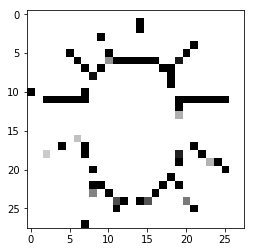

In [18]:
img = 1 - img
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

In [19]:
prediction = model.predict_classes(img) 

In [20]:
print(prediction)

for things in prediction:
    if things == 0:
        print ("cat")
    elif things == 1:
        print ("penguin")
    elif things == 2:
        print("ant")
    elif things == 3:
        print("bee")
    elif things == 4:
        print("flamingo")
    elif things == 5:
        print ("owl")
    elif things == 6:
        print ("pig")
    elif things == 7:
        print ("dolphin")
    elif things == 8:
        print ("snake")
    elif things == 9:
        print ("ice cream")
    elif things == 10:
        print ("sun")
    elif things == 11:
        print ("mushroom")
    elif things == 12: 
        print ("flower")
    elif things == 13:
        print ("cactus")
    else: 
        print("whoops")
        

[10]
sun
